<p>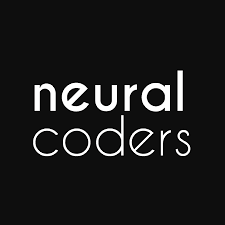</p>

<h1>We make data science easy</h1>

Código protegido por las licencias de Neural Coders S.A. 

Uso UNICAMENTE INTERNO.



<h1>Data Science Applications for Blockper Software</h1>
<p>Blockper es un software dedicado a simplificar las aplicaciones de la Ciencia de Datos de una forma sencilla, simple y fácil de aprender a usar. 

<p>Este notebook recopila algoritmos de suma importancia para data cleaning, data sanitization y Machine Learning.</p>

 <hr width=1000>

<h1>Data Cleaning<h1> 

El data cleaning es un conjunto de metodologías y prácticas utilizadas para convertir datos pocor servibles y dificiles de trabajar, en datos que nos proporcienen información sobre el negocios, asi como también, permitan su facil manejo y pruebas de modelos. 

#### 1 Importación de librerías

In [ ]:
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn import preprocessing

### 2 Lectura de Dataset
En esta sección se desarrollan dos formas de lectura de dataset. En primer lugar la lectura mediante Open, función propia de Python. En segundo lugar, la lectura convencional con la librería Pandas.

#### 2.1 Reading Dataset (Open)

In [ ]:
def read_df_open(path):
  df = open(path,"r")
  cols = df.readline().strip().split(",")
  n_cols = len(cols)
  count = 0
  main_dict = {}

  for col in cols:
    main_dict[col] = []
  
  for line in df:
    values = line.strip().split(",")
    for i in range(len(cols)):
      main_dict[cols[i]].append(values[i])
  count += 1
  df = pd.DataFrame(main_dict)
  return df

#### 2.2 Reading Dataset (Pandas)

In [ ]:
def read_df_pandas(path):
  '''Esta funcion recibe como parametro la direccion en donde se encuentra el archivo a leer. Retorna el dataframe.'''

  option = int(input("Wich type dataset? \n 1) CSV \n 2) SXLS \n 3) SQL \n"))

  if(option==1):
    df = pd.read_csv(path)
  elif(option==2):
    df = pd.read_excel(path)
  else:
    df = pd.read_sql_table(path)

  return df

#----------------------------------#

df = read_df_pandas("iris.csv")

Wich type dataset? 
 1) CSV 
 2) SXLS 
 3) SQL 
1


### 3 Funciones para documentación y profiling de dataset. 
Acá se encuentran múltiples funciones de importancias para mantener documentados y con información el Dataset cargado. 

####3.1 Funcion para documentar Dataset.

In [ ]:
def add_info_df():
  '''Esta funcion permite añadir mucha información a los dataset que guardamos en la plataforma. Retorna un diccionario con toda la info'''

  info={"Nombre":"","Descripcion":"","Categoria":""}
  cat_option=10
  categoria=""

  Nombre = input("Define un nombre para tu Dataset: \n")
  info["Nombre"]=Nombre

  descripcion = input("Agrega una descripción a tu dataset: \n")
  info["Descripcion"]=descripcion

  while(cat_option!=5):
    cat_option = int(input("¿En cuál categoria clasificas tu dataset? \n 1) Financiero. \n 2) Ventas. \n 3) Clientes. \n 4) Demográfico \n 5) No tiene."))
    if (cat_option==1):
      categoria="Financiero"
    elif(cat_option==2):
      categoria="Ventas"
    elif(cat_option==3):
      categoria="Clientes"
    elif(cat_option==4):
      categoria="Demografico"
    info["Categoria"]=categoria
  return info
  
    

####3.2 Función para mostrar información sobre el dataset

####3.2.1 Funciones generales para mostrar información

In [ ]:
def data_types_colums(df):
  '''Funcion que permite conocer los tipos de datos de cada columna'''
  return df.dtypes

def null_values(df):
  '''Funcion que permite conocer el conteo de nulos dentro del dataset'''  
  return df.isnull().sum()

def duplicate_values(df):
  '''Funcion que permite conocer el conteo de duplicados dentro del dataset''' 
  return df.duplicated().sum()

def data_summary(df):
  '''Retorna el sumario del dataset''' 
  summary = df.describe()
  summary = summary.transpose()
  return  summary

####3.2.2 Funcion principal para mostrar información.

In [ ]:
def data_info(df):
  '''Esta funcion permite conocer informacion general sobre los datos del dataset'''
  #La idea es generar un reporte rapido en pdf. Descargable.
  msg = "1) Mostrar los tipos de datos del dataset \n 2) Mostrar suma de valores nulos \n 3) Mostrar suma de valores nulos. \n 4) Sumario de datos. \n 5) Salir."
  option = 0

  while(option!=5):
    print(msg)
    option = int(input("Ingresa una opción: \n"))
    if (option==1):
      data_types_colums(df)
    elif(option==2):
      null_values(df)
    elif(option==3):
      duplicate_values(df)
    elif(option==4):
      data_summary(df)


####3.3 Generar reporte de perfil de los datos (Pandas Profiling).

####3.3.1 Funciones para generar reportes.

In [ ]:
#profile report
def profile_report_normal(df):
  '''Funcion que permite generar un reporte con pandas profiling. Este reporte será normal y habrá que usar scroll para verlo todo'''
  profile = ProfileReport(df, title="Pandas Profiling Report")
  profile.to_file("your_report.html") #esto guarda el report en html
  return profile

def profile_report_widgets(df):
  '''Funcion que permite generar un reporte con pandas profiling. Este reporte se puede navegar mediante pestañas (widgets).'''
  profile = ProfileReport(df, title="Pandas Profiling Report")
  profile = profile.to_widgets() #esto genera los widgets
  profile.to_file("your_report.html")#esto guarda el report en html
  return profile

####3.3.2 Función generar para generar reportes.

In [ ]:
def data_profiling(df):
  '''La libreria de data profiling tiene Licencia MIT, por lo que veo una oportunidad de simplificar el uso de esta.'''
  msg = "1) Descargar reporte. \n 2) Descargar reporte con widgets. 3) Salir."
  option = 0

  while(option!=3):
    print(msg)
    option=int(input("Digite una opcion: "))
    if(option==1):
      profile_report_normal(df)
    elif(option==2):
      profile_report_widgets(df)

###4 Data Cleaning

####4.1 Función para eliminar datos nulos, en blanco y duplicados.

In [ ]:
def data_cleaning(df):
  '''Esta funcion permite hacer la respectiva limpieza del dataset. Retorna un df nuevo'''
  #Seria ideal normalizar datos y eliminar columnas inservibles.
  option = 0
  msg = "1) Eliminar valores nulos del dataset. \n 2) Eliminar valores duplicados del dataset. \n 3) Reemplazar valores en blanco por Nulos 4) Reemplazar valores nulos por 0. \n 5) Salir."

  while(option!=5):
    option=int(input("Digite una opción: "))
    if(option==1):
      print("1) Borrar filas donde exista al menos un valor nulo \n 2) Borrar filas donde todas las columnas tengan valores nulos")
      option2 = int(input("Digite una opcion: "))
      if(option2==1):
        new_df = df.dropna(axis=0, how="any")
      elif(option==2):
        new_df = df.dropna(axis=0, how="all")
    elif(option==2):
      new_df = df.drop_duplicates()
    elif(option==3):
      new_df = df.replace(r'^\s*$', np.nan, regex=True)
    elif(option==4):
      new_df = df.fillna(0)
    return new_df


####4.2 Variables Dummy
En esta seccion se presentan una serie de funciones, las cuales permiten encontrar columnas dentro de una dataframe las cuales son objetos, indicio principal para que sea categoricas y por ende, hacer la funcion dummys en ellas.

####4.2.1 Detección de columnas categóricas.

In [ ]:
def category_list(df):
  '''Esta funcion devuelve una lista de String con las variables que son categoricas o al menos no son int o float.'''
  if(len(df.select_dtypes(include=['object']).columns.tolist())>1):
    return df.select_dtypes(include=['object']).columns.tolist()
  else:
    return "Este dataset no cuenta con variables categoricas"


#### 4.2.2 Deteccion de numero de columnas categoricas

In [ ]:
def num_colum_category(df):
  '''Esta funcion encuentra las posiciones exactas de las columans que son categoricas'''
  num=[]
  for i in range(len(df.columns.values)):
    if(df[df.columns.values[i]].dtypes == object):
      num.append(i)
  return num

#### 4.2.3 Generador de CSV de dummys

In [ ]:
def dummys_to_csv(df):
  '''Esta es la funcion principal que utiliza las dos anterior funciones para generar nuevos CSV.'''
  
  #los cuales  servirian de dos formas. 1) se analizan los csv por separado como dummys. 
  #2) se unen esos datos al df original y se eliminan las columnas que no son dommys

  for i in range(len(num_colum_category(df))):
    dummy = pd.get_dummies(df[df.columns.values[num_colum_category(df)[i]]], prefix=category_list(df)[0])
    dummy.to_csv('dummy'+ category_list(df)[i]+".csv")

In [ ]:
#Prueba para ver los dummys
dummys = pd.read_csv("dummySex.csv", index_col=0) #importante el index
dummys